# Advanced Pune Cafe Sales Dataset Analysis

### Objective

Identify the **top-performing-products** in terms of total revenue. Identify seasonal patterns and any significant anomalies or shifts in sales over the year.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:\\Users\\mohin\\Downloads\\Advanced_Pune_Cafe_Sales_2000.csv")
df

,order_id,date,outlet_location,outlet_manager,customer_type,item_category,item_name,quantity_sold,price_per_unit,total_bill,...,time_of_day,temperature_c,day_of_week,customer_rating,discount_percent,final_amount,special_event,staff_id,day_type,cumulative_sales_outlet
0,ORD51036,19-10-2025,Hinjewadi,Priya Nair,Regular,Snack,Cheese Garlic Bread,4,245,980,...,Morning,34.9,Sunday,3.1,15,833.00,Weekend Special,ST11,Weekend,833.00
1,ORD94971,09-10-2025,Kothrud,Arjun Mehta,Tourist,Beverage,Cappuccino,3,134,402,...,Evening,25.3,Thursday,3.0,0,402.00,NaN,ST4,Weekday,402.00
2,ORD82709,07-10-2025,Viman Nagar,Rohit Deshmukh,Tourist,Beverage,Green Tea,3,243,729,...,Evening,29.0,Tuesday,4.8,5,692.55,Weekend Special,ST22,Weekday,692.55
3,ORD61541,22-10-2025,Viman Nagar,Rohit Deshmukh,Tourist,Beverage,Cappuccino,1,174,174,...,Evening,25.7,Wednesday,4.8,0,174.00,Diwali Offer,ST22,Weekday,866.55
4,ORD20674,07-10-2025,Kothrud,Arjun Mehta,New,Dessert,Cheesecake,4,175,700,...,Afternoon,26.8,Tuesday,4.4,15,595.00,Coffee Fest,ST4,Weekday,997.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ORD88057,03-10-2025,Viman Nagar,Rohit Deshmukh,New,Beverage,Hot Chocolate,4,169,676,...,Evening,25.8,Friday,4.9,15,574.60,Weekend Special,ST14,Weekday,188004.30
1996,ORD71910,26-10-2025,Viman Nagar,Rohit Deshmukh,Tourist,Dessert,Brownie,1,171,171,...,Night,32.5,Sunday,3.8,0,171.00,Coffee Fest,ST20,Weekend,188175.30
1997,ORD13597,14-10-2025,Kothrud,Arjun Mehta,Tourist,Snack,Pasta,4,162,648,...,Afternoon,32.7,Tuesday,3.1,5,615.60,NaN,ST16,Weekday,175690.50
1998,ORD37000,18-10-2025,Koregaon Park,Amit Sharma,New,Snack,French Fries,3,234,702,...,Morning,30.0,Saturday,3.2,10,631.80,NaN,ST10,Weekend,190355.85


In [5]:
df.head()


,order_id,date,outlet_location,outlet_manager,customer_type,item_category,item_name,quantity_sold,price_per_unit,total_bill,...,time_of_day,temperature_c,day_of_week,customer_rating,discount_percent,final_amount,special_event,staff_id,day_type,cumulative_sales_outlet
0,ORD51036,19-10-2025,Hinjewadi,Priya Nair,Regular,Snack,Cheese Garlic Bread,4,245,980,...,Morning,34.9,Sunday,3.1,15,833.00,Weekend Special,ST11,Weekend,833.00
1,ORD94971,09-10-2025,Kothrud,Arjun Mehta,Tourist,Beverage,Cappuccino,3,134,402,...,Evening,25.3,Thursday,3.0,0,402.00,NaN,ST4,Weekday,402.00
2,ORD82709,07-10-2025,Viman Nagar,Rohit Deshmukh,Tourist,Beverage,Green Tea,3,243,729,...,Evening,29.0,Tuesday,4.8,5,692.55,Weekend Special,ST22,Weekday,692.55
3,ORD61541,22-10-2025,Viman Nagar,Rohit Deshmukh,Tourist,Beverage,Cappuccino,1,174,174,...,Evening,25.7,Wednesday,4.8,0,174.00,Diwali Offer,ST22,Weekday,866.55
4,ORD20674,07-10-2025,Kothrud,Arjun Mehta,New,Dessert,Cheesecake,4,175,700,...,Afternoon,26.8,Tuesday,4.4,15,595.00,Coffee Fest,ST4,Weekday,997.00


In [6]:
df.tail()

,order_id,date,outlet_location,outlet_manager,customer_type,item_category,item_name,quantity_sold,price_per_unit,total_bill,...,time_of_day,temperature_c,day_of_week,customer_rating,discount_percent,final_amount,special_event,staff_id,day_type,cumulative_sales_outlet
1995,ORD88057,03-10-2025,Viman Nagar,Rohit Deshmukh,New,Beverage,Hot Chocolate,4,169,676,...,Evening,25.8,Friday,4.9,15,574.6,Weekend Special,ST14,Weekday,188004.30
1996,ORD71910,26-10-2025,Viman Nagar,Rohit Deshmukh,Tourist,Dessert,Brownie,1,171,171,...,Night,32.5,Sunday,3.8,0,171.0,Coffee Fest,ST20,Weekend,188175.30
1997,ORD13597,14-10-2025,Kothrud,Arjun Mehta,Tourist,Snack,Pasta,4,162,648,...,Afternoon,32.7,Tuesday,3.1,5,615.6,NaN,ST16,Weekday,175690.50
1998,ORD37000,18-10-2025,Koregaon Park,Amit Sharma,New,Snack,French Fries,3,234,702,...,Morning,30.0,Saturday,3.2,10,631.8,NaN,ST10,Weekend,190355.85
1999,ORD86916,22-10-2025,Kothrud,Arjun Mehta,New,Beverage,Hot Chocolate,4,224,896,...,Evening,25.2,Wednesday,3.0,5,851.2,NaN,ST11,Weekday,176541.70


In [7]:
df.drop(['order_id','staff_id'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     2000 non-null   object 
 1   outlet_location          2000 non-null   object 
 2   outlet_manager           2000 non-null   object 
 3   customer_type            2000 non-null   object 
 4   item_category            2000 non-null   object 
 5   item_name                2000 non-null   object 
 6   quantity_sold            2000 non-null   int64  
 7   price_per_unit           2000 non-null   int64  
 8   total_bill               2000 non-null   int64  
 9   cost_price               2000 non-null   float64
 10  profit                   2000 non-null   float64
 11  payment_mode             2000 non-null   object 
 12  time_of_day              2000 non-null   object 
 13  temperature_c            2000 non-null   float64
 14  day_of_week             

In [9]:
df.describe()

,quantity_sold,price_per_unit,total_bill,cost_price,profit,temperature_c,customer_rating,discount_percent,final_amount,cumulative_sales_outlet
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.499500,200.353000,500.813500,350.866920,149.946580,29.518550,3.993100,7.642500,462.413100,92518.355200
std,1.113831,58.527866,274.319218,195.203022,88.624357,3.165595,0.581938,5.519957,255.380474,53543.128595
min,1.000000,100.000000,100.000000,63.150000,21.620000,24.000000,3.000000,0.000000,85.850000,203.300000
25%,2.000000,150.000000,267.750000,183.082500,79.637500,26.775000,3.500000,5.000000,246.575000,46386.687500
50%,3.000000,201.000000,460.000000,316.375000,131.355000,29.600000,4.000000,10.000000,421.900000,91790.750000
75%,3.000000,249.000000,696.750000,478.690000,203.172500,32.300000,4.500000,15.000000,636.300000,138889.637500
max,4.000000,300.000000,1200.000000,946.730000,477.600000,35.000000,5.000000,15.000000,1200.000000,190768.200000


In [10]:
df.describe(include='all')

,date,outlet_location,outlet_manager,customer_type,item_category,item_name,quantity_sold,price_per_unit,total_bill,cost_price,...,payment_mode,time_of_day,temperature_c,day_of_week,customer_rating,discount_percent,final_amount,special_event,day_type,cumulative_sales_outlet
count,2000,2000,2000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000,2000,2000.000000,2000,2000.000000,2000.000000,2000.000000,593,2000,2000.000000
unique,31,5,5,3,3,17,NaN,NaN,NaN,NaN,...,3,4,NaN,7,NaN,NaN,NaN,3,2,NaN
top,19-10-2025,Koregaon Park,Amit Sharma,Tourist,Beverage,Ice Cream,NaN,NaN,NaN,NaN,...,Card,Morning,NaN,Wednesday,NaN,NaN,NaN,Weekend Special,Weekday,NaN
freq,65,428,428,675,696,145,NaN,NaN,NaN,NaN,...,683,524,NaN,324,NaN,NaN,NaN,207,1483,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.499500,200.353000,500.813500,350.866920,...,NaN,NaN,29.518550,NaN,3.993100,7.642500,462.413100,NaN,NaN,92518.355200
std,NaN,NaN,NaN,NaN,NaN,NaN,1.113831,58.527866,274.319218,195.203022,...,NaN,NaN,3.165595,NaN,0.581938,5.519957,255.380474,NaN,NaN,53543.128595
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,100.000000,100.000000,63.150000,...,NaN,NaN,24.000000,NaN,3.000000,0.000000,85.850000,NaN,NaN,203.300000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,150.000000,267.750000,183.082500,...,NaN,NaN,26.775000,NaN,3.500000,5.000000,246.575000,NaN,NaN,46386.687500
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,201.000000,460.000000,316.375000,...,NaN,NaN,29.600000,NaN,4.000000,10.000000,421.900000,NaN,NaN,91790.750000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,249.000000,696.750000,478.690000,...,NaN,NaN,32.300000,NaN,4.500000,15.000000,636.300000,NaN,NaN,138889.637500


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

date                          0
outlet_location               0
outlet_manager                0
customer_type                 0
item_category                 0
item_name                     0
quantity_sold                 0
price_per_unit                0
total_bill                    0
cost_price                    0
profit                        0
payment_mode                  0
time_of_day                   0
temperature_c                 0
day_of_week                   0
customer_rating               0
discount_percent              0
final_amount                  0
special_event              1407
day_type                      0
cumulative_sales_outlet       0
dtype: int64

In [13]:
df["date"] = pd.to_datetime(df["date"])

C:\Users\mohin\AppData\Local\Temp\ipykernel_9732\3228555721.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["date"] = pd.to_datetime(df["date"])


In [14]:
df['Day'] = df['date'].dt.day
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

In [15]:
df.isnull().sum()

date                          0
outlet_location               0
outlet_manager                0
customer_type                 0
item_category                 0
item_name                     0
quantity_sold                 0
price_per_unit                0
total_bill                    0
cost_price                    0
profit                        0
payment_mode                  0
time_of_day                   0
temperature_c                 0
day_of_week                   0
customer_rating               0
discount_percent              0
final_amount                  0
special_event              1407
day_type                      0
cumulative_sales_outlet       0
Day                           0
Month                         0
Year                          0
dtype: int64

In [16]:
df.drop(['date'],axis=1,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   outlet_location          2000 non-null   object 
 1   outlet_manager           2000 non-null   object 
 2   customer_type            2000 non-null   object 
 3   item_category            2000 non-null   object 
 4   item_name                2000 non-null   object 
 5   quantity_sold            2000 non-null   int64  
 6   price_per_unit           2000 non-null   int64  
 7   total_bill               2000 non-null   int64  
 8   cost_price               2000 non-null   float64
 9   profit                   2000 non-null   float64
 10  payment_mode             2000 non-null   object 
 11  time_of_day              2000 non-null   object 
 12  temperature_c            2000 non-null   float64
 13  day_of_week              2000 non-null   object 
 14  customer_rating         

In [18]:
df.head()

,outlet_location,outlet_manager,customer_type,item_category,item_name,quantity_sold,price_per_unit,total_bill,cost_price,profit,...,day_of_week,customer_rating,discount_percent,final_amount,special_event,day_type,cumulative_sales_outlet,Day,Month,Year
0,Hinjewadi,Priya Nair,Regular,Snack,Cheese Garlic Bread,4,245,980,771.03,208.97,...,Sunday,3.1,15,833.00,Weekend Special,Weekend,833.00,19,10,2025
1,Kothrud,Arjun Mehta,Tourist,Beverage,Cappuccino,3,134,402,267.03,134.97,...,Thursday,3.0,0,402.00,NaN,Weekday,402.00,9,10,2025
2,Viman Nagar,Rohit Deshmukh,Tourist,Beverage,Green Tea,3,243,729,519.16,209.84,...,Tuesday,4.8,5,692.55,Weekend Special,Weekday,692.55,7,10,2025
3,Viman Nagar,Rohit Deshmukh,Tourist,Beverage,Cappuccino,1,174,174,105.44,68.56,...,Wednesday,4.8,0,174.00,Diwali Offer,Weekday,866.55,22,10,2025
4,Kothrud,Arjun Mehta,New,Dessert,Cheesecake,4,175,700,559.49,140.51,...,Tuesday,4.4,15,595.00,Coffee Fest,Weekday,997.00,7,10,2025


In [19]:
df.shape

(2000, 23)

In [20]:
df.nunique()

outlet_location               5
outlet_manager                5
customer_type                 3
item_category                 3
item_name                    17
quantity_sold                 4
price_per_unit              201
total_bill                  581
cost_price                 1969
profit                     1935
payment_mode                  3
time_of_day                   4
temperature_c               111
day_of_week                   7
customer_rating              21
discount_percent              4
final_amount               1258
special_event                 3
day_type                      2
cumulative_sales_outlet    1999
Day                          31
Month                         1
Year                          1
dtype: int64

In [21]:
df['outlet_location'].value_counts()

outlet_location
Koregaon Park    428
Hinjewadi        405
Viman Nagar      399
Baner            389
Kothrud          379
Name: count, dtype: int64

In [22]:
df[df['outlet_location']=='Hinjewadi']

,outlet_location,outlet_manager,customer_type,item_category,item_name,quantity_sold,price_per_unit,total_bill,cost_price,profit,...,day_of_week,customer_rating,discount_percent,final_amount,special_event,day_type,cumulative_sales_outlet,Day,Month,Year
0,Hinjewadi,Priya Nair,Regular,Snack,Cheese Garlic Bread,4,245,980,771.03,208.97,...,Sunday,3.1,15,833.00,Weekend Special,Weekend,833.00,19,10,2025
12,Hinjewadi,Priya Nair,New,Dessert,Donut,1,289,289,183.21,105.79,...,Monday,4.9,15,245.65,NaN,Weekday,1078.65,20,10,2025
13,Hinjewadi,Priya Nair,Tourist,Dessert,Ice Cream,3,293,879,655.87,223.13,...,Saturday,4.8,15,747.15,NaN,Weekend,1825.80,25,10,2025
18,Hinjewadi,Priya Nair,Regular,Dessert,Cheesecake,1,288,288,195.27,92.73,...,Thursday,4.8,10,259.20,NaN,Weekday,2085.00,23,10,2025
25,Hinjewadi,Priya Nair,New,Dessert,Donut,4,200,800,483.75,316.25,...,Monday,4.5,15,680.00,NaN,Weekday,2765.00,20,10,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,Hinjewadi,Priya Nair,Regular,Dessert,Brownie,4,103,412,295.07,116.93,...,Friday,3.8,5,391.40,Weekend Special,Weekday,188920.95,3,10,2025
1974,Hinjewadi,Priya Nair,Tourist,Beverage,Green Tea,3,147,441,317.89,123.11,...,Friday,3.2,5,418.95,NaN,Weekday,189339.90,17,10,2025
1977,Hinjewadi,Priya Nair,Regular,Beverage,Hot Chocolate,3,141,423,300.03,122.97,...,Tuesday,4.9,5,401.85,NaN,Weekday,189741.75,14,10,2025
1986,Hinjewadi,Priya Nair,Regular,Dessert,Chocolate Muffin,4,249,996,724.14,271.86,...,Sunday,3.5,10,896.40,NaN,Weekend,190638.15,19,10,2025


In [23]:
df['item_category'].value_counts()

item_category
Beverage    696
Snack       665
Dessert     639
Name: count, dtype: int64

In [24]:
df[(df['item_category'] == 'Beverage') & (df['outlet_location'] == 'Baner')]

,outlet_location,outlet_manager,customer_type,item_category,item_name,quantity_sold,price_per_unit,total_bill,cost_price,profit,...,day_of_week,customer_rating,discount_percent,final_amount,special_event,day_type,cumulative_sales_outlet,Day,Month,Year
7,Baner,Sneha Patil,New,Beverage,Cappuccino,3,243,729,479.32,249.68,...,Tuesday,4.7,10,656.10,NaN,Weekday,656.10,7,10,2025
19,Baner,Sneha Patil,Tourist,Beverage,Green Tea,3,213,639,457.25,181.75,...,Wednesday,4.0,5,607.05,Weekend Special,Weekday,1425.15,8,10,2025
24,Baner,Sneha Patil,Regular,Beverage,Cappuccino,2,160,320,241.22,78.78,...,Monday,3.3,15,272.00,NaN,Weekday,1879.05,27,10,2025
27,Baner,Sneha Patil,Tourist,Beverage,Cold Coffee,1,164,164,106.94,57.06,...,Wednesday,4.8,15,139.40,NaN,Weekday,2018.45,29,10,2025
30,Baner,Sneha Patil,New,Beverage,Masala Chai,4,111,444,295.78,148.22,...,Wednesday,4.1,5,421.80,NaN,Weekday,2440.25,15,10,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,Baner,Sneha Patil,Tourist,Beverage,Masala Chai,3,151,453,334.03,118.97,...,Sunday,4.1,15,385.05,NaN,Weekend,174450.55,19,10,2025
1933,Baner,Sneha Patil,Tourist,Beverage,Green Tea,1,252,252,177.46,74.54,...,Sunday,3.9,0,252.00,Weekend Special,Weekend,175390.80,12,10,2025
1935,Baner,Sneha Patil,Regular,Beverage,Masala Chai,2,197,394,292.07,101.93,...,Thursday,3.4,5,374.30,NaN,Weekday,175765.10,23,10,2025
1971,Baner,Sneha Patil,Tourist,Beverage,Masala Chai,2,273,546,394.69,151.31,...,Friday,3.4,5,518.70,Weekend Special,Weekday,177094.70,24,10,2025


In [25]:
df['item_name'].value_counts()

item_name
Ice Cream              145
Iced Latte             145
Brownie                140
Cappuccino             131
Hot Chocolate          129
Paneer Wrap            124
Chocolate Muffin       122
French Fries           120
Cold Coffee            120
Donut                  117
Cheesecake             115
Burger                 114
Cheese Garlic Bread    110
Pasta                   99
Veg Sandwich            98
Masala Chai             87
Green Tea               84
Name: count, dtype: int64

In [26]:
df['payment_mode'].value_counts()

payment_mode
Card    683
UPI     660
Cash    657
Name: count, dtype: int64

In [27]:
df['time_of_day'].value_counts()

time_of_day
Morning      524
Afternoon    495
Night        492
Evening      489
Name: count, dtype: int64

In [28]:
item_with_customer_rating = df.groupby('item_name')['customer_rating'].mean().sort_values(ascending=False)
item_with_customer_rating

item_name
Masala Chai            4.079310
Cheese Garlic Bread    4.079091
Burger                 4.073684
Cheesecake             4.070435
Cappuccino             4.064122
Hot Chocolate          4.022481
Veg Sandwich           4.012245
Paneer Wrap            3.986290
Green Tea              3.985714
Iced Latte             3.964828
Chocolate Muffin       3.963115
Ice Cream              3.951724
French Fries           3.951667
Pasta                  3.946465
Brownie                3.945714
Donut                  3.940171
Cold Coffee            3.890000
Name: customer_rating, dtype: float64

- Masala chai, cheese garlic bread, and burger have the highest average customer ratings around 4.07-4.08 out of 5 and the lower average item is cold coffee with rating of 3.89.

In [30]:
df['customer_rating'].max()

5.0

In [31]:
df[df['customer_rating'] == 5.0]

,outlet_location,outlet_manager,customer_type,item_category,item_name,quantity_sold,price_per_unit,total_bill,cost_price,profit,...,day_of_week,customer_rating,discount_percent,final_amount,special_event,day_type,cumulative_sales_outlet,Day,Month,Year
11,Koregaon Park,Amit Sharma,New,Beverage,Masala Chai,1,100,100,63.15,36.85,...,Thursday,5.0,10,90.00,NaN,Weekday,497.60,23,10,2025
21,Kothrud,Arjun Mehta,Tourist,Beverage,Hot Chocolate,3,206,618,470.30,147.70,...,Friday,5.0,0,618.00,Diwali Offer,Weekday,2142.25,31,10,2025
104,Viman Nagar,Rohit Deshmukh,New,Beverage,Cappuccino,1,240,240,182.13,57.87,...,Thursday,5.0,5,228.00,NaN,Weekday,8522.30,30,10,2025
109,Hinjewadi,Priya Nair,New,Dessert,Cheesecake,1,111,111,71.37,39.63,...,Sunday,5.0,10,99.90,NaN,Weekend,11246.15,26,10,2025
110,Baner,Sneha Patil,Regular,Dessert,Chocolate Muffin,2,254,508,339.91,168.09,...,Tuesday,5.0,0,508.00,NaN,Weekday,11739.15,21,10,2025
169,Kothrud,Arjun Mehta,Regular,Snack,Burger,1,228,228,158.83,69.17,...,Thursday,5.0,0,228.00,Weekend Special,Weekday,13057.45,2,10,2025
174,Kothrud,Arjun Mehta,New,Beverage,Iced Latte,1,245,245,169.02,75.98,...,Sunday,5.0,10,220.50,NaN,Weekend,13384.15,19,10,2025
229,Koregaon Park,Amit Sharma,Tourist,Dessert,Cheesecake,4,173,692,429.16,262.84,...,Wednesday,5.0,5,657.40,NaN,Weekday,22146.25,8,10,2025
272,Baner,Sneha Patil,Tourist,Beverage,Green Tea,1,126,126,96.76,29.24,...,Saturday,5.0,10,113.40,NaN,Weekend,28545.15,4,10,2025
274,Kothrud,Arjun Mehta,Regular,Dessert,Cheesecake,3,243,729,538.93,190.07,...,Sunday,5.0,0,729.00,Coffee Fest,Weekend,23227.60,19,10,2025


In [32]:
df[(df['customer_rating'] == 5.0) & (df['time_of_day']=='Morning')]

,outlet_location,outlet_manager,customer_type,item_category,item_name,quantity_sold,price_per_unit,total_bill,cost_price,profit,...,day_of_week,customer_rating,discount_percent,final_amount,special_event,day_type,cumulative_sales_outlet,Day,Month,Year
110,Baner,Sneha Patil,Regular,Dessert,Chocolate Muffin,2,254,508,339.91,168.09,...,Tuesday,5.0,0,508.00,NaN,Weekday,11739.15,21,10,2025
581,Kothrud,Arjun Mehta,New,Beverage,Iced Latte,1,189,189,134.96,54.04,...,Monday,5.0,10,170.10,NaN,Weekday,49845.85,20,10,2025
1211,Koregaon Park,Amit Sharma,Tourist,Beverage,Iced Latte,4,226,904,577.18,326.82,...,Saturday,5.0,0,904.00,NaN,Weekend,117573.35,4,10,2025
1429,Kothrud,Arjun Mehta,Tourist,Beverage,Iced Latte,3,203,609,449.13,159.87,...,Tuesday,5.0,5,578.55,NaN,Weekday,121956.35,21,10,2025
1518,Koregaon Park,Amit Sharma,New,Dessert,Chocolate Muffin,2,276,552,414.01,137.99,...,Monday,5.0,10,496.80,NaN,Weekday,142017.90,13,10,2025
1611,Viman Nagar,Rohit Deshmukh,Tourist,Snack,Cheese Garlic Bread,2,209,418,275.51,142.49,...,Sunday,5.0,0,418.00,NaN,Weekend,139622.35,5,10,2025
1711,Viman Nagar,Rohit Deshmukh,Tourist,Beverage,Green Tea,3,278,834,558.60,275.40,...,Friday,5.0,0,834.00,NaN,Weekday,153798.85,3,10,2025
1741,Kothrud,Arjun Mehta,New,Dessert,Donut,1,255,255,170.85,84.15,...,Tuesday,5.0,0,255.00,Weekend Special,Weekday,148715.55,28,10,2025
1782,Viman Nagar,Rohit Deshmukh,Tourist,Beverage,Hot Chocolate,4,235,940,629.53,310.47,...,Friday,5.0,10,846.00,NaN,Weekday,164681.20,10,10,2025
1802,Koregaon Park,Amit Sharma,Tourist,Dessert,Donut,4,185,740,486.99,253.01,...,Wednesday,5.0,0,740.00,NaN,Weekday,170168.80,29,10,2025


In [33]:
df['quantity_sold'].max()

4

In [34]:
item_sales = df.groupby('item_name')['quantity_sold'].sum().reset_index()
item_with_highest_quantity = item_sales.loc[item_sales['quantity_sold'].idxmax()]

In [35]:
print(item_with_highest_quantity)

item_name        Ice Cream
quantity_sold          358
Name: 11, dtype: object


- 'Ice cream' is the item with the highest quantity sold (358 units).

In [37]:
df['total_bill'].max()

1200

In [38]:
item_category_with_highest_total_bill = df.groupby('item_category')['total_bill'].sum().idxmax()
item_category_with_highest_total_bill

'Beverage'

In [39]:
most_profitable_item = df.loc[df['profit'].idxmax()]

In [40]:
most_profitable_item

outlet_location            Koregaon Park
outlet_manager               Amit Sharma
customer_type                        New
item_category                   Beverage
item_name                  Hot Chocolate
quantity_sold                          4
price_per_unit                       300
total_bill                          1200
cost_price                         722.4
profit                             477.6
payment_mode                        Card
time_of_day                        Night
temperature_c                       27.3
day_of_week                       Friday
customer_rating                      3.6
discount_percent                      10
final_amount                      1080.0
special_event                        NaN
day_type                         Weekday
cumulative_sales_outlet         128234.4
Day                                   10
Month                                 10
Year                                2025
Name: 1326, dtype: object

In [41]:
least_profitable_item = df.loc[df['profit'].idxmin()]

In [42]:
least_profitable_item

outlet_location                Kothrud
outlet_manager             Arjun Mehta
customer_type                      New
item_category                 Beverage
item_name                   Cappuccino
quantity_sold                        1
price_per_unit                     102
total_bill                         102
cost_price                       80.38
profit                           21.62
payment_mode                      Cash
time_of_day                    Morning
temperature_c                     28.3
day_of_week                     Monday
customer_rating                    4.5
discount_percent                     0
final_amount                     102.0
special_event                      NaN
day_type                       Weekday
cumulative_sales_outlet        39506.4
Day                                  6
Month                               10
Year                              2025
Name: 466, dtype: object

In [43]:
df_daily_sales = df.groupby(['day_of_week', 'item_category'])['quantity_sold'].sum().reset_index().sort_values(by='day_of_week' , ascending=True)

In [44]:
df_daily_sales

,day_of_week,item_category,quantity_sold
0,Friday,Beverage,270
1,Friday,Dessert,240
2,Friday,Snack,293
3,Monday,Beverage,226
4,Monday,Dessert,204
5,Monday,Snack,207
6,Saturday,Beverage,218
7,Saturday,Dessert,218
8,Saturday,Snack,221
11,Sunday,Snack,246


In [45]:
sales_by_day_type = df.groupby('day_type').size()
sales_by_day_type

day_type
Weekday    1483
Weekend     517
dtype: int64

In [46]:
most_sold_day_type = sales_by_day_type.sort_values(ascending=False).head(1)
most_sold_day_type

day_type
Weekday    1483
dtype: int64

In [47]:
most_popular_day = sales_by_day_type.idxmax()
most_popular_day

'Weekday'

In [48]:
total_sales_on_day = sales_by_day_type.max()
total_sales_on_day

1483

In [49]:
print(f'The Most Popular Day Type is: {most_popular_day} and (Total Sales: {total_sales_on_day})')


The Most Popular Day Type is: Weekday and (Total Sales: 1483)


In [50]:
df_filtered = df[df['day_type'] == most_popular_day]
item_sales_on_day = df_filtered.groupby('item_name').size()
most_sold_item = item_sales_on_day.idxmax()
item_sales_count = item_sales_on_day.max()
most_sold_item

'Hot Chocolate'

In [51]:
item_sales_count

107

In [52]:
print(f'The item sold most frequently on {most_popular_day} is: {most_sold_item}')
print(f"  (It sold {item_sales_count} times on {most_popular_day}s)")

# Optional: Show all items on that day type
print("\nTop Items on that Day:")
print(item_sales_on_day.sort_values(ascending=False))

The item sold most frequently on Weekday is: Hot Chocolate
  (It sold 107 times on Weekdays)

Top Items on that Day:
item_name
Hot Chocolate          107
Brownie                101
Chocolate Muffin       101
Cappuccino              98
Iced Latte              94
Ice Cream               94
French Fries            94
Donut                   93
Paneer Wrap             90
Cold Coffee             87
Cheesecake              82
Veg Sandwich            80
Burger                  77
Cheese Garlic Bread     77
Pasta                   75
Green Tea               67
Masala Chai             66
dtype: int64


In [53]:
# count of occurrence of each payment mode
payment_counts = df['payment_mode'].value_counts()
payment_counts

payment_mode
Card    683
UPI     660
Cash    657
Name: count, dtype: int64

In [54]:
# Group by Location and Item, and sum the Revenue ---
# We use 'final_amount' as the revenue column.
revenue_by_item_location = df.groupby(['outlet_location', 'item_name'])['final_amount'].sum().reset_index()

# Rename the column for clarity
revenue_by_item_location = revenue_by_item_location.rename(columns={'final_amount': 'Total_Revenue'})

# Create a clean, readable pivot table ---
# Convert the result to a pivot table where locations are columns
pivot_table = revenue_by_item_location.pivot_table(
    index='item_name', 
    columns='outlet_location', 
    values='Total_Revenue', 
    fill_value=0 # Fill missing values (items not sold in a location) with 0
)

# Sort the columns (locations) alphabetically for a cleaner look
pivot_table = pivot_table.sort_index(axis=1)

# Display the top 10 rows and the full data summary
print("--- Pivot Table: Total Revenue (INR) of Items by Location ---")
print(pivot_table)



--- Pivot Table: Total Revenue (INR) of Items by Location ---
outlet_location         Baner  Hinjewadi  Koregaon Park   Kothrud  Viman Nagar
item_name                                                                     
Brownie              13626.55   13263.75       10217.10  12149.65     10472.15
Burger                9567.05    7888.15        9355.45  12744.25     10581.20
Cappuccino           12931.20   14915.70       11936.00   9147.45     14048.45
Cheese Garlic Bread  11160.40   10468.35       10933.55   8951.05      7776.35
Cheesecake           10644.65    6249.25       14055.45  10120.00      9148.25
Chocolate Muffin      8626.90   13794.35       10006.15   8679.95     17744.90
Cold Coffee           8723.30   14466.50        9111.80  12307.30     10551.20
Donut                 9405.80   11159.20       13939.05  10881.95      8242.75
French Fries         10228.80   10858.40       12866.15  12069.80     11635.70
Green Tea             7459.05    8624.30        7967.00   5582.65    

In [55]:
# Group by Manager and sum the Profit ---
profit_by_manager = df.groupby('outlet_manager')['profit'].sum().reset_index()

# Rename the profit column for clarity
profit_by_manager = profit_by_manager.rename(columns={'profit': 'Total_Profit'})

# Sort to find the highest profit ---
most_profitable_manager = profit_by_manager.sort_values(
    by='Total_Profit',
    ascending=False
)

# Extract the details of the most profitable manager
top_manager = most_profitable_manager.iloc[0]

# --- Final Results ---
print("--- Most Profitable Manager ---")
print(f"Manager: {top_manager['outlet_manager']}")
print(f"   Total Profit: ₹{top_manager['Total_Profit']:,.2f}")

print("\n--- Full Ranking of Managers by Total Profit (INR) ---")
print(most_profitable_manager.round(2))

--- Most Profitable Manager ---
Manager: Priya Nair
   Total Profit: ₹62,974.35

--- Full Ranking of Managers by Total Profit (INR) ---
   outlet_manager  Total_Profit
2      Priya Nair      62974.35
0     Amit Sharma      62047.43
3  Rohit Deshmukh      60974.74
4     Sneha Patil      57429.17
1     Arjun Mehta      56467.47


In [56]:
df.columns

Index(['outlet_location', 'outlet_manager', 'customer_type', 'item_category',
       'item_name', 'quantity_sold', 'price_per_unit', 'total_bill',
       'cost_price', 'profit', 'payment_mode', 'time_of_day', 'temperature_c',
       'day_of_week', 'customer_rating', 'discount_percent', 'final_amount',
       'special_event', 'day_type', 'cumulative_sales_outlet', 'Day', 'Month',
       'Year'],
      dtype='object')

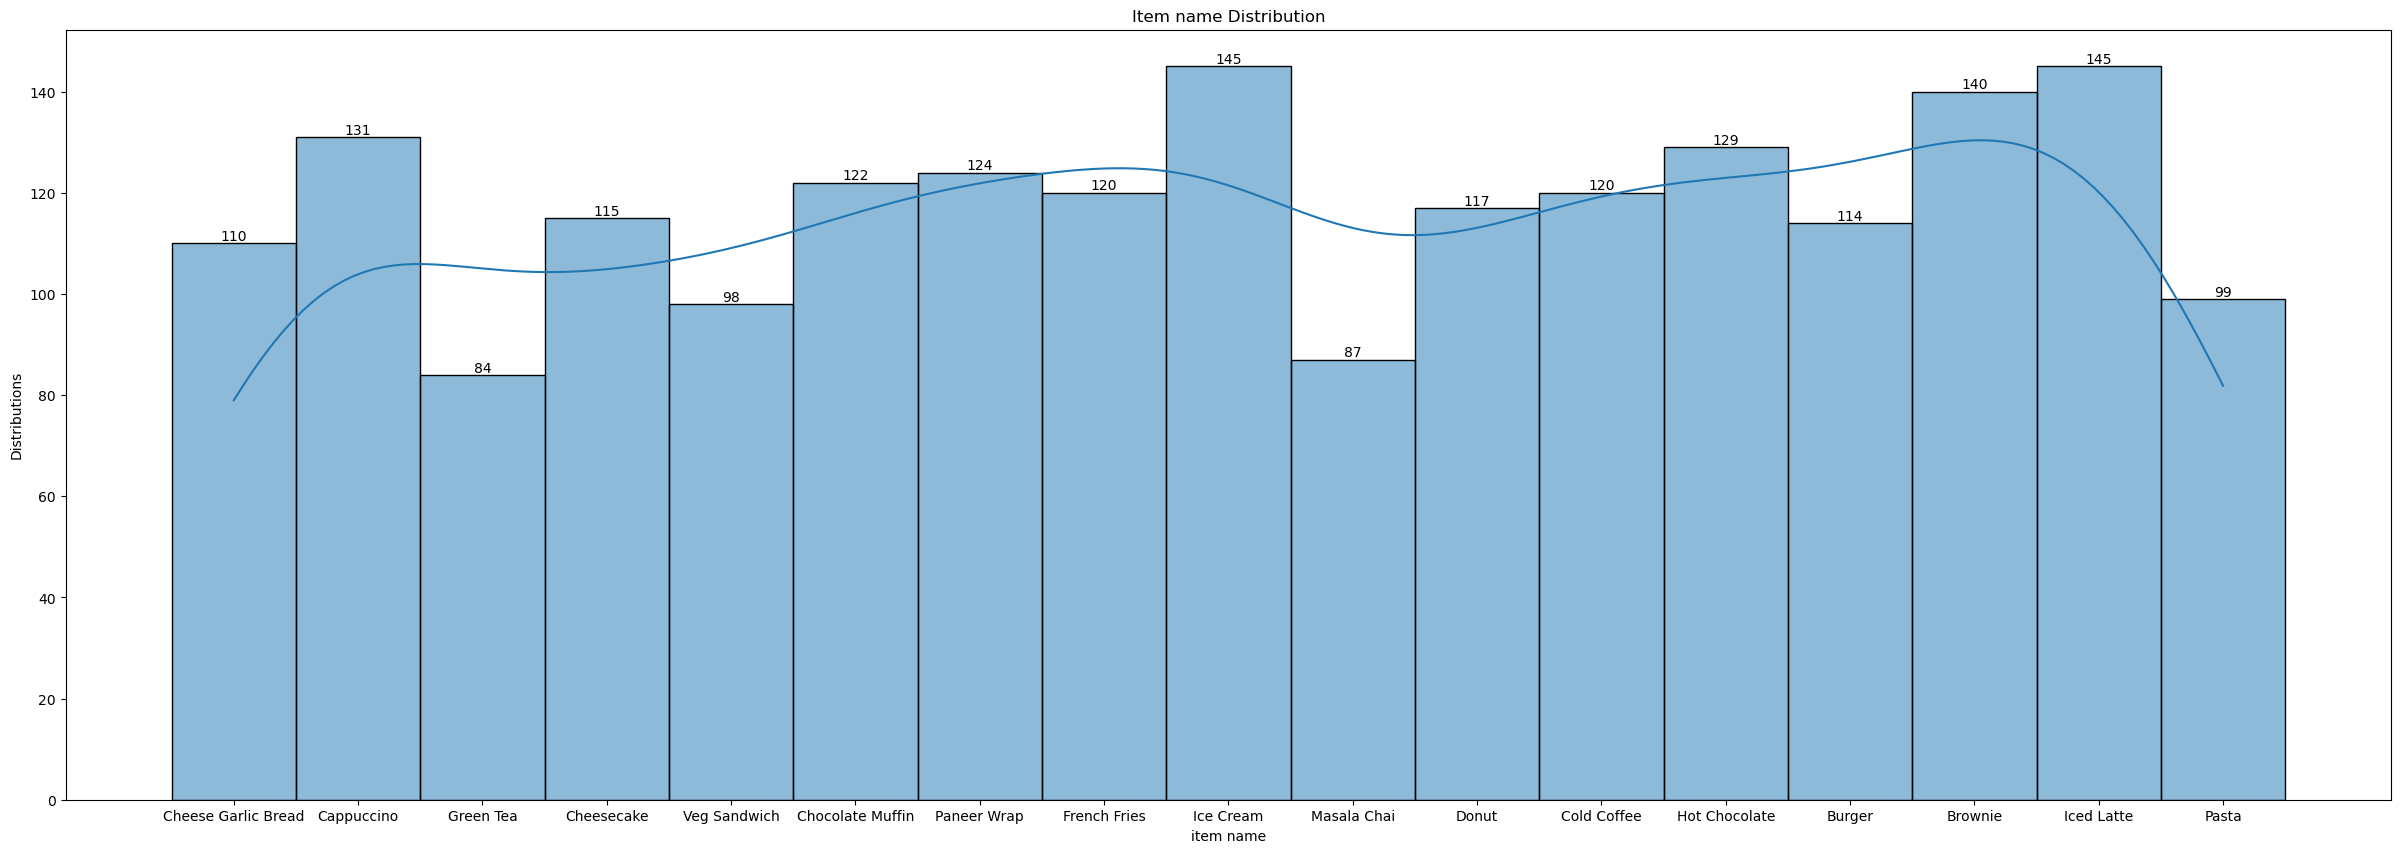

In [57]:
plt.figure(figsize=(30,10))
ax=sns.histplot(df['item_name'],bins=20,kde=True)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Item name Distribution')
plt.xlabel('item name')
plt.ylabel('Distributions')
plt.show()

Ice cream and Ice latte are among the top-selling items.

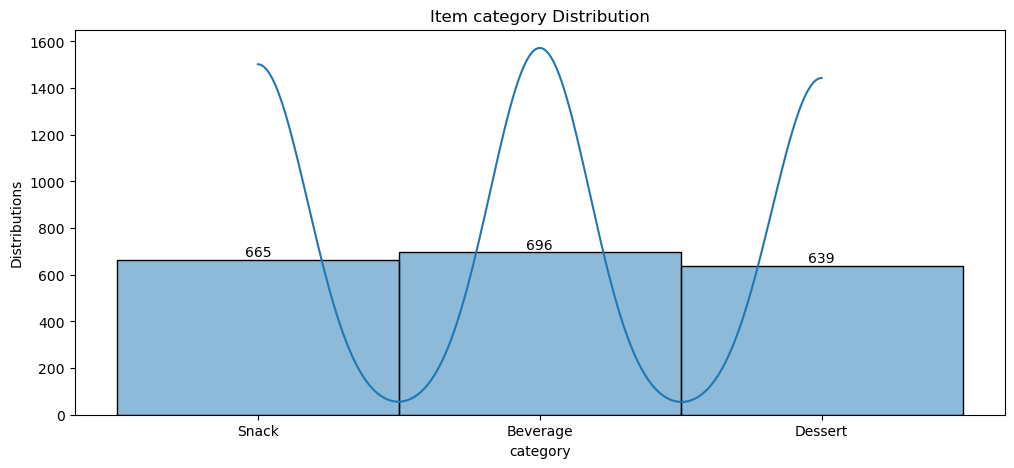

In [59]:
plt.figure(figsize=(12,5))
ax=sns.histplot(df['item_category'],bins=20,kde=True)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Item category Distribution')
plt.xlabel('category')
plt.ylabel('Distributions')
plt.show()

The graph suggests that the Beverage category has the highest distribution count.

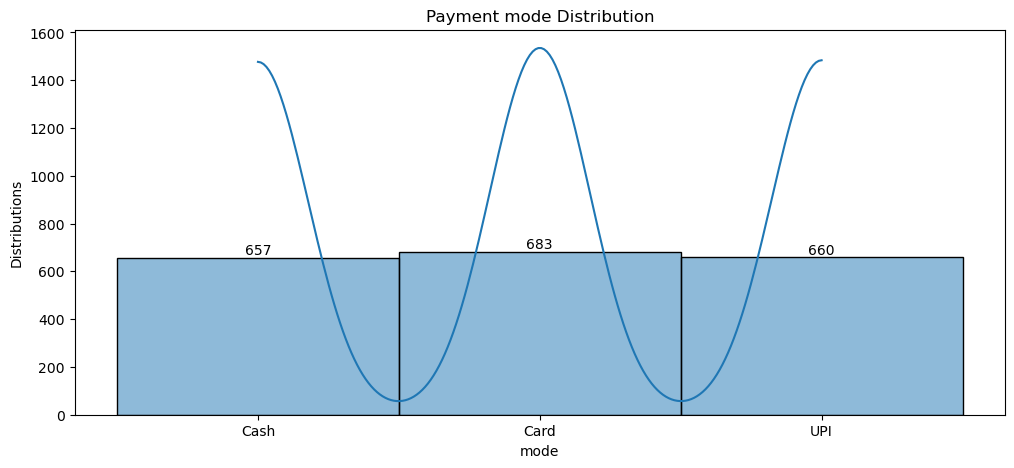

In [61]:
plt.figure(figsize=(12,5))
ax=sns.histplot(df['payment_mode'],bins=20,kde=True)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Payment mode Distribution')
plt.xlabel('mode')
plt.ylabel('Distributions')
plt.show()

Card Payment mode has the highest number of transactions (683).through it's only marginally higher than UPI snd Cash.

C:\Users\mohin\AppData\Local\Temp\ipykernel_9732\289543395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['item_category'],palette='Set2')


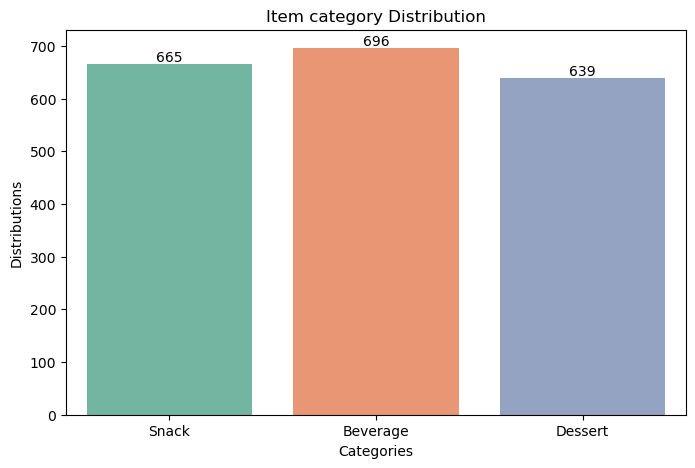

In [63]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=df['item_category'],palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Item category Distribution')
plt.xlabel('Categories')
plt.ylabel('Distributions')
plt.show()

Beverages items have the highest distribution. This suggests that drinks are the most frequently purchased category in the cafe.

C:\Users\mohin\AppData\Local\Temp\ipykernel_9732\3830144382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['customer_type'],palette='Set2')


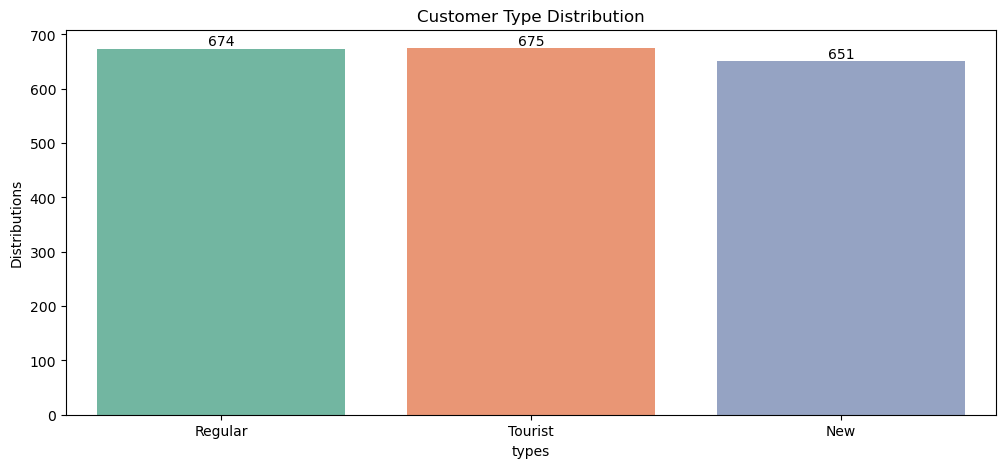

In [65]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x=df['customer_type'],palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Customer Type Distribution')
plt.xlabel('types')
plt.ylabel('Distributions')
plt.show()

C:\Users\mohin\AppData\Local\Temp\ipykernel_9732\1940234491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['outlet_location'],palette='Set2')


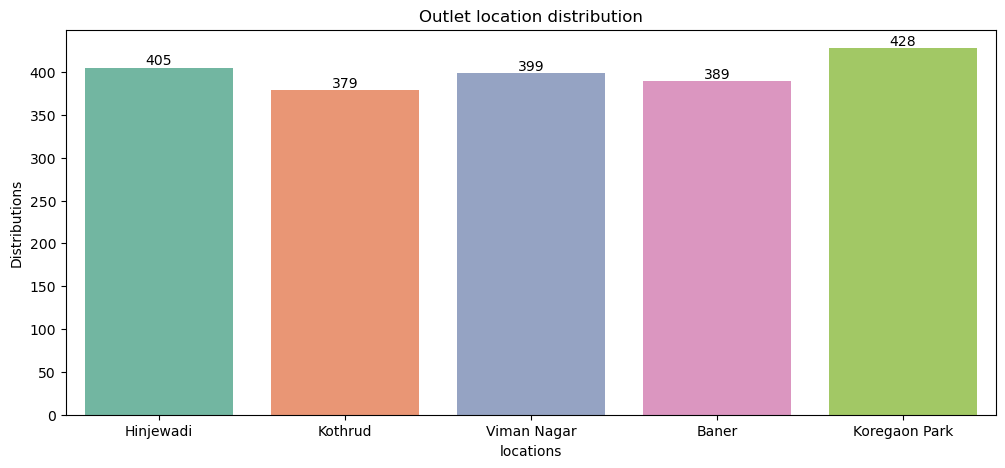

In [66]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x=df['outlet_location'],palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Outlet location distribution')
plt.xlabel('locations')
plt.ylabel('Distributions')
plt.show()

C:\Users\mohin\AppData\Local\Temp\ipykernel_9732\69487488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['outlet_manager'],palette='Set2')


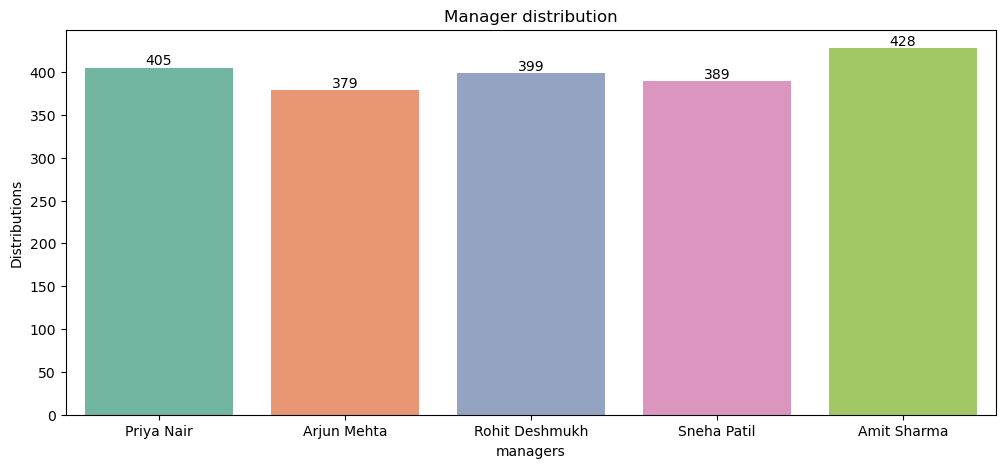

In [67]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x=df['outlet_manager'],palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Manager distribution')
plt.xlabel('managers')
plt.ylabel('Distributions')
plt.show()

C:\Users\mohin\AppData\Local\Temp\ipykernel_9732\3293878285.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['time_of_day'],palette='Set2')


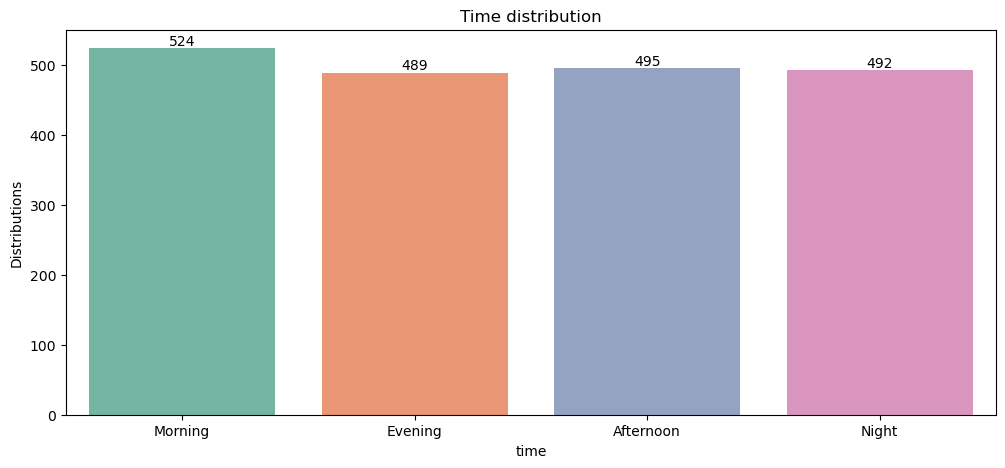

In [68]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x=df['time_of_day'],palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Time distribution')
plt.xlabel('time')
plt.ylabel('Distributions')
plt.show()

C:\Users\mohin\AppData\Local\Temp\ipykernel_9732\4008108873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['day_type'],palette='coolwarm')


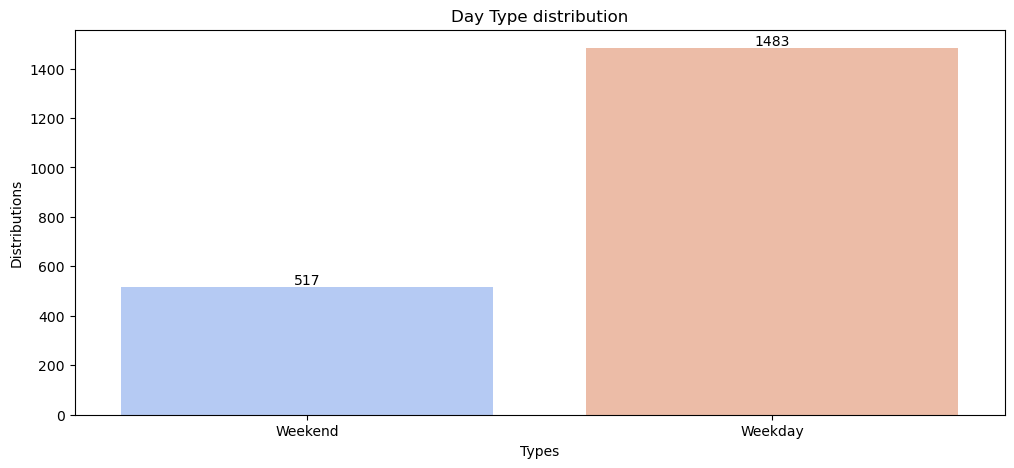

In [69]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x=df['day_type'],palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Day Type distribution')
plt.xlabel('Types')
plt.ylabel('Distributions')
plt.show()

C:\Users\mohin\AppData\Local\Temp\ipykernel_9732\740436518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['special_event'],palette='Set2')


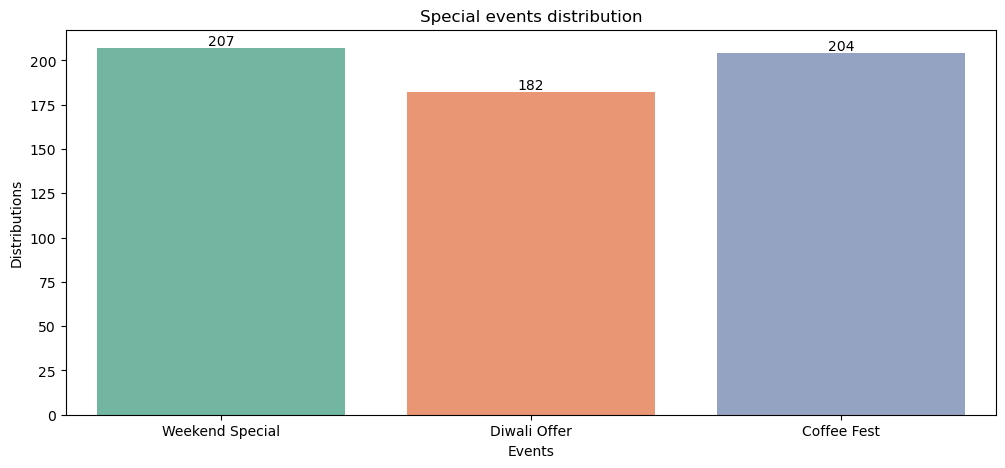

In [70]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x=df['special_event'],palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Special events distribution')
plt.xlabel('Events')
plt.ylabel('Distributions')
plt.show()

C:\Users\mohin\AppData\Local\Temp\ipykernel_9732\1678369371.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['day_of_week'],palette='Set2')


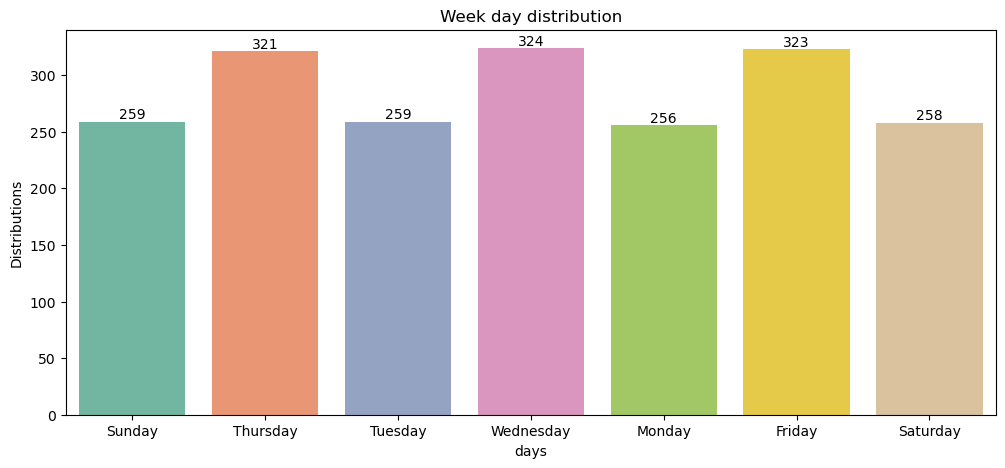

In [71]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x=df['day_of_week'],palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Week day distribution')
plt.xlabel('days')
plt.ylabel('Distributions')
plt.show()

In [72]:
df.columns

Index(['outlet_location', 'outlet_manager', 'customer_type', 'item_category',
       'item_name', 'quantity_sold', 'price_per_unit', 'total_bill',
       'cost_price', 'profit', 'payment_mode', 'time_of_day', 'temperature_c',
       'day_of_week', 'customer_rating', 'discount_percent', 'final_amount',
       'special_event', 'day_type', 'cumulative_sales_outlet', 'Day', 'Month',
       'Year'],
      dtype='object')

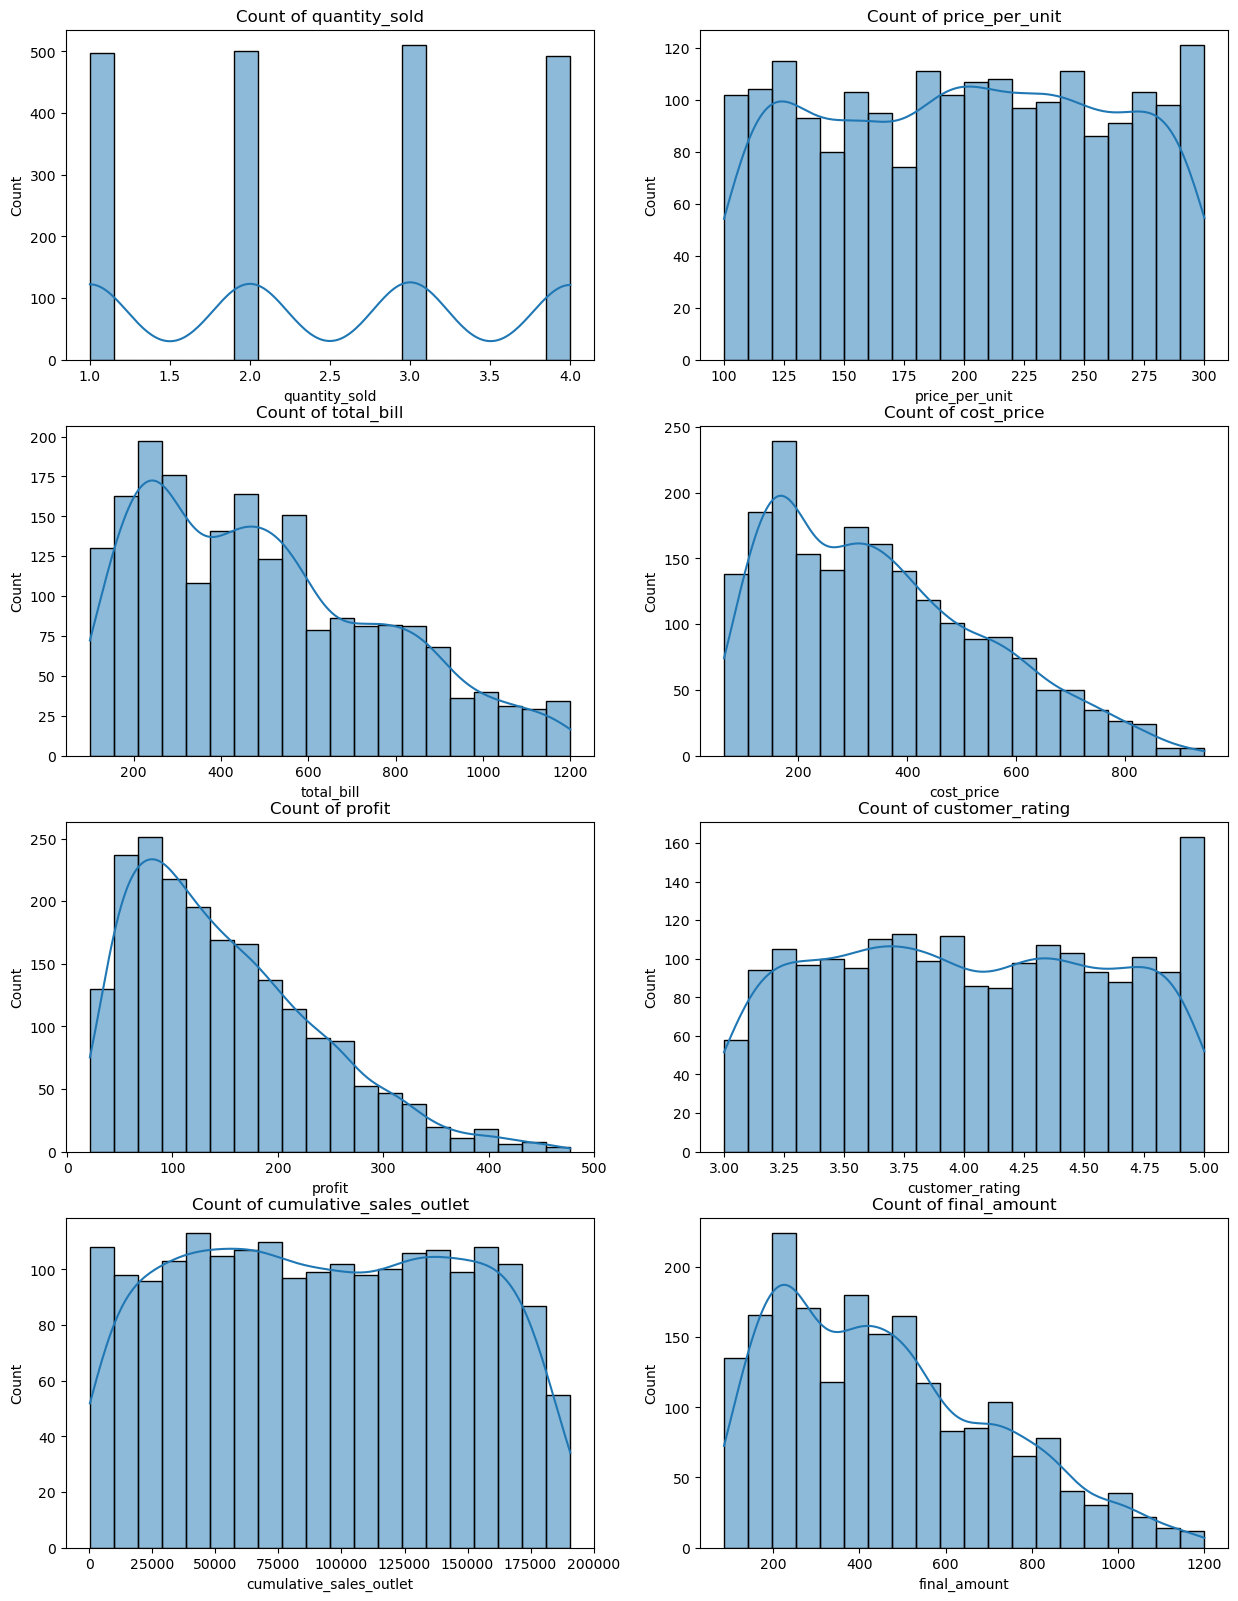

In [73]:
num=['quantity_sold','price_per_unit','total_bill','cost_price','profit','customer_rating','cumulative_sales_outlet','final_amount']
def univariate_analysis(n):
    plt.figure(figsize=(15, 30))
    for i, col in enumerate(n, 1):
        plt.subplot(6,2,i)
        plt.title(f"Count of {col}")
        sns.histplot(x=df[col],bins=20,kde=True)
    plt.show()

univariate_analysis(num)

<Figure size 4000x2500 with 0 Axes>

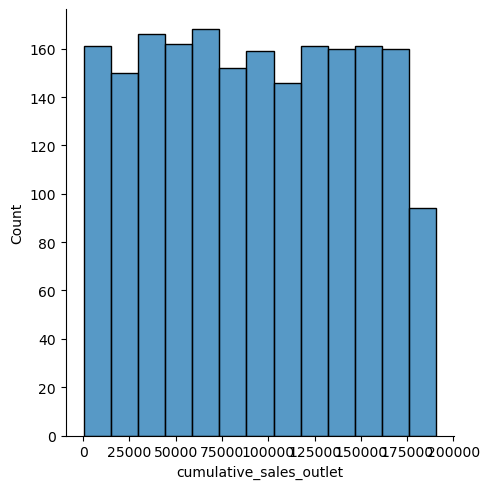

In [74]:
plt.figure(figsize=(40,25))
sns.displot(df['cumulative_sales_outlet'])

In [75]:
df['cumulative_sales_outlet'].skew()

0.018740620667663733

<Axes: xlabel='cumulative_sales_outlet', ylabel='Count'>

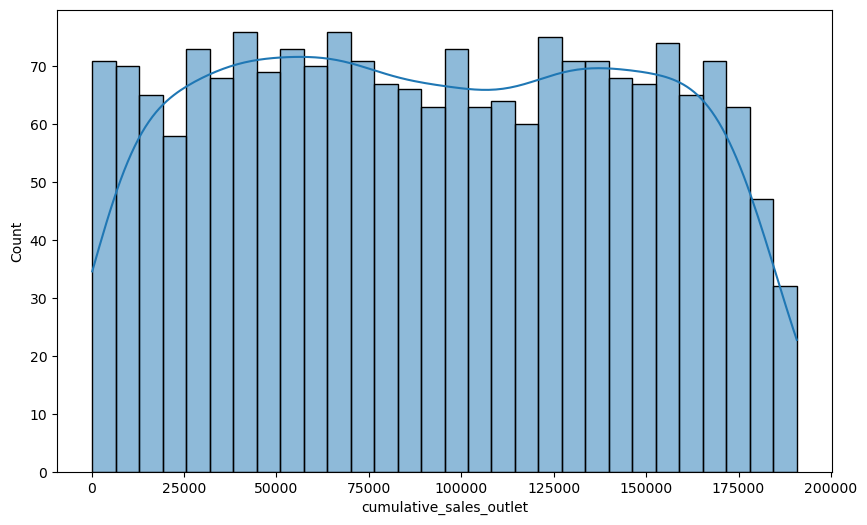

In [76]:
plt.figure(figsize=(10, 6))

# kde=True plots the smooth density function that visually represents the distribution shape
sns.histplot(
    df['cumulative_sales_outlet'],
    kde=True,
    bins=30,  # Number of bins for the histogram bars
)

In [150]:
skewness_ = df.select_dtypes(include = ['number']).skew()
skewness_

quantity_sold             -0.003091
price_per_unit            -0.019605
total_bill                 0.589197
cost_price                 0.640520
profit                     0.897387
temperature_c             -0.030487
customer_rating            0.026735
discount_percent          -0.024230
final_amount               0.638589
cumulative_sales_outlet    0.018741
Day                        0.002849
Month                      0.000000
Year                       0.000000
dtype: float64

In [154]:
skewness_.sort_values(ascending=True)

temperature_c             -0.030487
discount_percent          -0.024230
price_per_unit            -0.019605
quantity_sold             -0.003091
Month                      0.000000
Year                       0.000000
Day                        0.002849
cumulative_sales_outlet    0.018741
customer_rating            0.026735
total_bill                 0.589197
final_amount               0.638589
cost_price                 0.640520
profit                     0.897387
dtype: float64

In [162]:
num_df = df.select_dtypes(include=['number'])
corr_matrix = num_df.corr()
corr_matrix

,quantity_sold,price_per_unit,total_bill,cost_price,profit,temperature_c,customer_rating,discount_percent,final_amount,cumulative_sales_outlet,Day,Month,Year
quantity_sold,1.000000,0.000478,0.810380,0.800152,0.745968,0.001883,-0.033115,0.000418,0.803933,0.038670,-0.008251,NaN,NaN
price_per_unit,0.000478,1.000000,0.536288,0.525952,0.501517,-0.065308,0.011522,0.016134,0.531621,-0.047729,0.016350,NaN,NaN
total_bill,0.810380,0.536288,1.000000,0.985108,0.925516,-0.035355,-0.023533,0.008307,0.992378,0.008441,0.003932,NaN,NaN
cost_price,0.800152,0.525952,0.985108,1.000000,0.846618,-0.030063,-0.025426,0.005809,0.978103,0.006014,-0.003948,NaN,NaN
profit,0.745968,0.501517,0.925516,0.846618,1.000000,-0.043218,-0.016837,0.012918,0.917351,0.012880,0.020867,NaN,NaN
temperature_c,0.001883,-0.065308,-0.035355,-0.030063,-0.043218,1.000000,0.020832,-0.010508,-0.031986,-0.025123,0.034063,NaN,NaN
customer_rating,-0.033115,0.011522,-0.023533,-0.025426,-0.016837,0.020832,1.000000,-0.063855,-0.016040,-0.000907,0.001151,NaN,NaN
discount_percent,0.000418,0.016134,0.008307,0.005809,0.012918,-0.010508,-0.063855,1.000000,-0.099551,-0.031385,-0.023555,NaN,NaN
final_amount,0.803933,0.531621,0.992378,0.978103,0.917351,-0.031986,-0.016040,-0.099551,1.000000,0.012287,0.007841,NaN,NaN
cumulative_sales_outlet,0.038670,-0.047729,0.008441,0.006014,0.012880,-0.025123,-0.000907,-0.031385,0.012287,1.000000,0.024684,NaN,NaN


<Axes: >

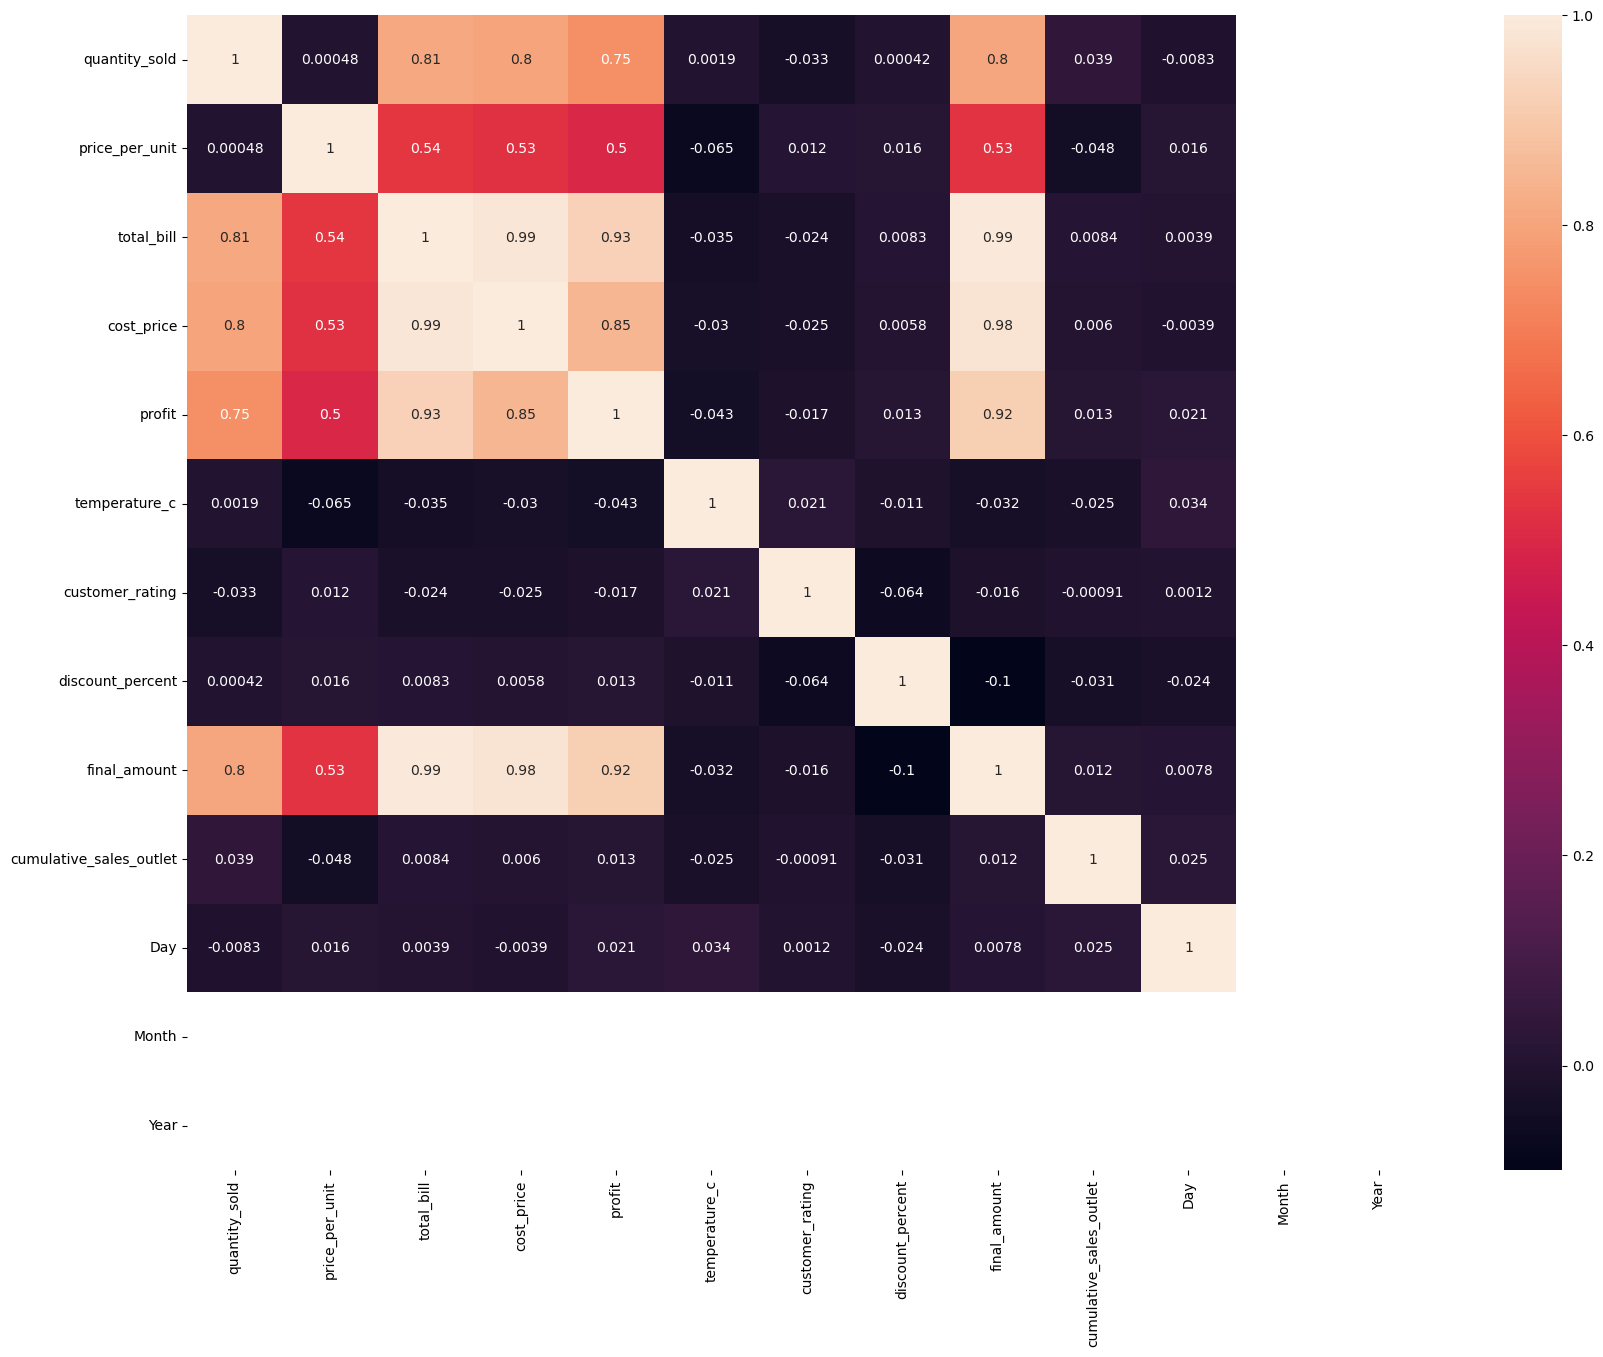

In [164]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True)